<a href="https://colab.research.google.com/github/SebastianNavarro1/EDA_FundamentosML_SebastianNavarro/blob/main/Prueba_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Aqui importamos todas las librerias necesarias para trabajar

  Ocupamos pandas para el procesado de la informacion, como puede ser leer el dataset

  Matplotlib para la visualizacion de graficos



In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
np.random.seed(211982)

%matplotlib inline

Aqui se importa toda la informacion del dataset y se muestran los 10 primeros datos de cada fila

In [7]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",", encoding='latin-1')
df.head(10)

Saving data.csv to data (2).csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


Aqui podemos ver la cantidad de datos de cada columna

In [20]:
df.count()

,0
InvoiceNo,541909
StockCode,541909
Description,540455
Quantity,541909
InvoiceDate,541909
UnitPrice,541909
CustomerID,406829
Country,541909


Aqui vemos el tipo de dato de cada columna para saber como trabajar con la información de la manera correcta


In [9]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


Aqui describimos la informacion de las columnas de tipo numero como son float64 e int64 para tener el

Count (Cantidad de datos),

Mean (media)

STD (Desviacion estandar)

min (Valor minimo)

25% (primer cuartil)

50% (segundo cuartil)

75% (tercer cuartil)

max (valor maximo)


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Aqui se puede ver el valor proemdio de lo que seria un ticket o una factura, siendo de 376,36 Libras Esterlinas

In [27]:
df['Total']= df['Quantity'] * df['UnitPrice']
Ticket_Promedio= df.groupby('InvoiceNo')['Total'].sum().mean()

print(Ticket_Promedio)

376.3609240926641


Aqui se pueden apreciar cuales son los 10 productos mas vendidos

In [30]:
Producto_Vendido=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(Producto_Vendido.head(10))

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


Aqui se puede apreciar la diferencia de ventas por pais y se puede ver que a el pais que mas se le venden productos es al reino unido ya que es una empresa del reino unido

Tambien se aprecia que paises bajos, Irlanda(EIRE) y Alemania son los paises top 3 fuera del pais de origen.

Y los paises que menos producto compran son Arabia saudi,Barein y Republica Checa.

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

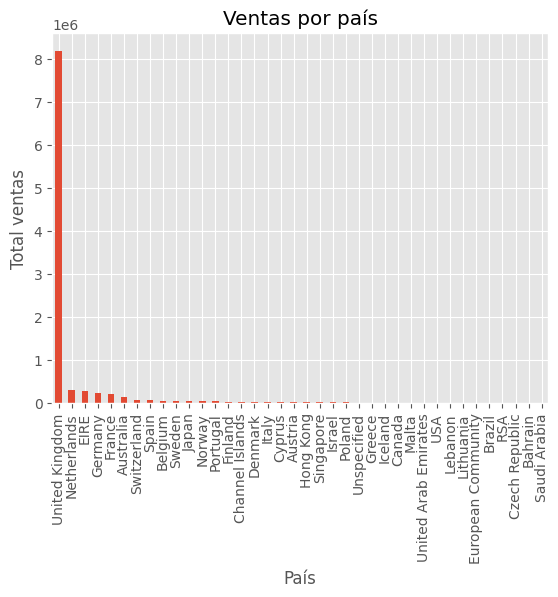

In [34]:
df['Total']= df['Quantity'] * df['UnitPrice']
Dif_Paises= df.groupby('Country')['Total'].sum().sort_values(ascending=False)

print(Dif_Paises)

Dif_Paises.plot(kind='bar')
plt.title('Ventas por país')
plt.xlabel('País')
plt.ylabel('Total ventas')
plt.show()